In [263]:
import numpy as np
from random import  random
from typing import List
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

### One-dimensional methods

In [122]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['lines.markersize'] = 0.5
def visualize(x: List[int], fx: List[float], title: str = ""):
    plt.plot(x, fx, color='blue', label="f(x)")
    plt.plot(x[fx.index(min(fx))],min(fx), marker='o', markersize=5, color='red', label="Minimum")
    plt.xlabel("x", fontsize=15)
    plt.ylabel("f(x)", fontsize=15)
    plt.title(title, fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

In [4]:
eps = 0.001

Functions

In [7]:
def f_cube(x):
    return x**3

In [9]:
def f_abs(x):
    return abs(x - 0.2)

In [13]:
def f_sin(x):
    return x * np.sin(1/x)

#### Algorithms

1) Exaustive search

In [50]:
def brute_force(a, b, eps, func):
    fx = []
    n = 1 / eps
    for k in tqdm(np.arange(a, b + eps, eps)):
        fx.append(func(k))
    return fx #return results of function cimputation

In [55]:
a = brute_force(0, 1, 0.001, f_cube)

100%|██████████| 1001/1001 [00:00<00:00, 997741.99it/s]


In [127]:
print(f'Count of iterations {len(a)}')

Count of iterations 1001


In [56]:
b = brute_force(0, 1, 0.001, f_abs)

100%|██████████| 1001/1001 [00:00<00:00, 990445.46it/s]


In [129]:
print(f'Count of iterations {len(b)}')

Count of iterations 1001


In [57]:
c = brute_force(0.01, 1, 0.001, f_sin)

100%|██████████| 991/991 [00:00<00:00, 198299.47it/s]


In [130]:
print(f'Count of iterations {len(c)}')

Count of iterations 991


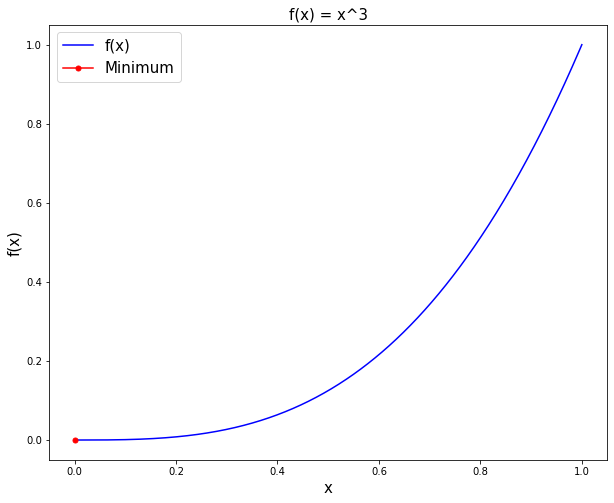

In [126]:
visualize(np.arange(0, 1 + eps, eps), a, 'f(x) = x^3');

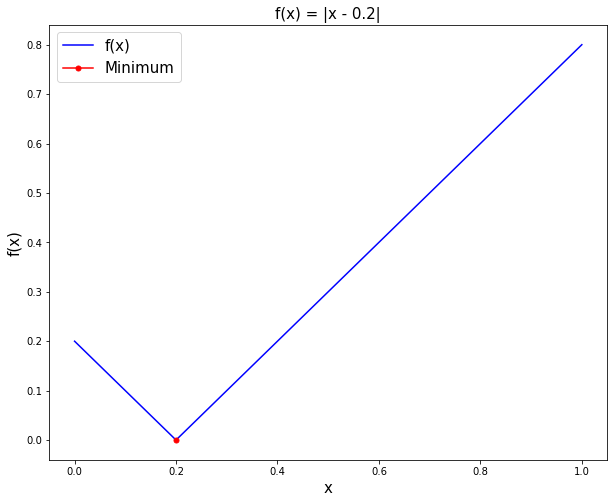

In [124]:
visualize(np.arange(0, 1 + eps, eps), b, 'f(x) = |x - 0.2|');

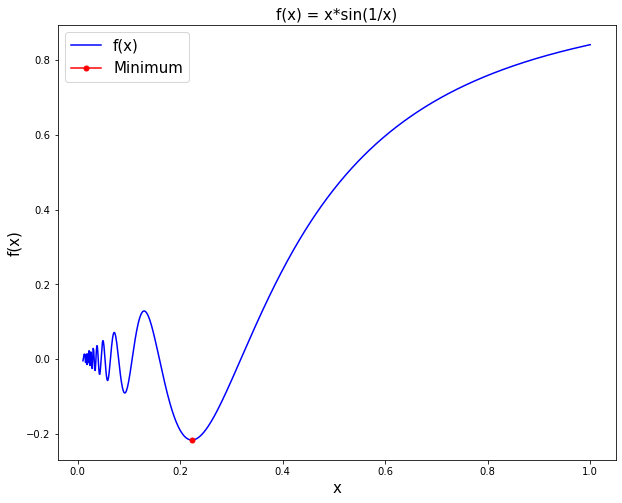

In [125]:
visualize(np.arange(0.01, 1 + eps, eps), c, 'f(x) = x*sin(1/x)');

2) Dichotomy

In [195]:
def dichotomy(a, b, eps, func):
    call = 0
    beta = eps - eps / 10
    rounds = 0 # number of iterations
    while abs(a - b) > eps:
        call += 1
        xmin = (a + b - beta) / 2
        xmax = (a + b + beta) / 2
        rounds += 2
        if func(xmin) <= func(xmax):
            b = xmax
        else:
            a = xmin
    return func((a + b) / 2), rounds + 1, call

In [196]:
a1 = dichotomy(0, 1, 0.001, f_cube)

In [197]:
a1

(1.1093111164523245e-10, 29, 14)

In [198]:
b1 = dichotomy(0, 1, 0.001, f_abs)

In [199]:
b1

(7.785034179669248e-06, 29, 14)

In [200]:
c1 = dichotomy(0.01, 1, 0.001, f_sin)

In [201]:
c1

(-0.2172336224666543, 29, 14)

3) Golden section

In [259]:
def golden_section(f, a, b, eps):
    
    x1 = a + (3 - np.sqrt(5)) * (b - a) / 2
    x2 = b + (np.sqrt(5) - 3) * (b - a) / 2
    call = 0
    rounds = 1
    while abs(b - a) > eps:
        call += 1
        if f(x1) <= f(x2):
            b = x2
        else:
            a = x1

        x1 = a + (3 - np.sqrt(5)) * (b - a) / 2
        x2 = b + (np.sqrt(5) - 3) * (b - a) / 2
        rounds += 1

    return f((b + a) / 2), rounds, call

In [260]:
a2 = golden_section(f_cube, 0, 1, 0.001)
a2

(4.9256800857728645e-11, 16, 15)

In [261]:
b2 = golden_section(f_abs, 0, 1, 0.001)
b2

(7.331374358574005e-05, 16, 15)

In [262]:
c2 = golden_section(f_sin, 0.01, 1, 0.001)
c2

(-0.2172323281775325, 16, 15)

### Multidimensional methods

In [344]:
a = random()
b = random()

In [293]:
# Generates randim numbers
x = []
y = []
for k in range(100):
    x.append(k / 100)
    y.append(a * x[k] + b + random())

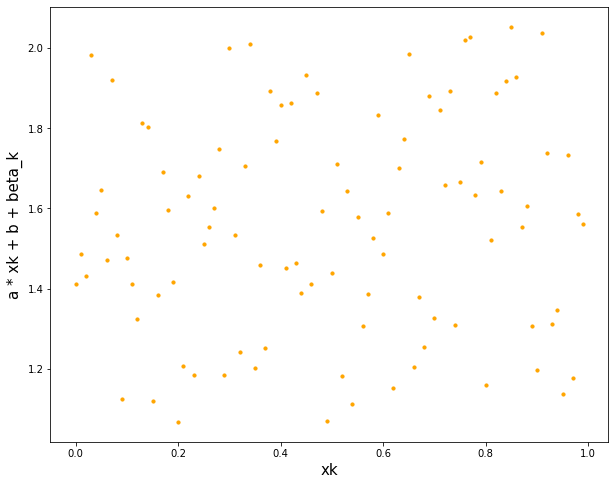

In [389]:
plt.scatter(x, y, marker='o', color='orange', s=10)
plt.xlabel("xk", fontsize=15)
plt.ylabel("a * xk + b + beta_k", fontsize=15);

Functions

In [386]:
def f_linear(x, a, b):
    return a * x + b

In [296]:
def f_rational(x, a, b):
    return a / (1 + b * x)

In [372]:
def least_squares(x0, a, b):
    global x, y
    func = f_linear
    return np.sum((func(x, a, b) - y)**2) / x.shape[0]

In [373]:
result_nm = scipy.optimize.minimize(least_squares, x[0], args=(0,1), method='Nelder-Mead')

TypeError: can only concatenate list (not "int") to list

In [360]:
result_nm

 final_simplex: (array([[0.00e+00],
       [6.25e-05]]), array([1., 1.]))
           fun: 1.0
       message: 'Optimization terminated successfully.'
          nfev: 8
           nit: 3
        status: 0
       success: True
             x: array([0.])

In [385]:
test = scipy.optimize.least_squares(f_linear(x, a, b), x)

TypeError: 'list' object is not callable